# Prepare Chicago Crime Data for a GitHub Repository

- Original Notebook Source: https://github.com/coding-dojo-data-science/preparing-chicago-crime-data
- Updated 11/17/22

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

- 1) Go to the Chicago Data Portal's page for ["Crimes - 2001 to Preset"](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

- 2) Click on the Export button on the top right and select CSV. 
    - Save the file to your Downloads folder instead of your repository. **The file is too big for a repository.**
    
    
    
- 3) Wait for the full file to download. 
    - It is very large (over >1.7GB and may take several minutes to fully download.)
    
    
- 4) Once the download is complete, change `RAW_FILE` variable below to match the filepath to the downloaded file.

## 🚨 Set the correct `RAW_FILE` path

- The cell below will attempt to check your Downloads folder for any file with a name that contains "Crimes_-_2001_to_Present".
    - If you know the file path already, you can skip the next cell and just manually set the RAW_FILE variable in the following code cell.

In [1]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')


- Your Downloads folder is 'C:\Users\Melissa\Downloads/'



<span style="color:red"> **IF THE CODE ABOVE DID NOT FIND YOUR DOWNLOADED FILE, UNCOMMENT AND CHANGE THE `"YOUR FILEPATH HERE"` VARIABLE ONLY IN THE CELL BELOW**

In [ ]:
## (Required) MAKE SURE TO CHANGE THIS VARIABLE TO MATCH YOUR LOCAL FILE NAME
#RAW_FILE = ('Data/Crimes.csv')

<span style="color:red"> **DO NOT CHANGE ANYTHING IN THE CELL BELOW**

In [2]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\Melissa\\Downloads\\Crimes_-_2001_to_Present.csv'

In [3]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

# 🔄 Full Workflow

- Now that your RAW_FILE variable is set either:
    - On the toolbar, click on the Kernel menu > "Restart and Run All".
    - OR click on this cell first, then on the toolbar click on the "Cell" menu > "Run All Below"

In [4]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7855397,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7855398,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7855399,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7855400,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [5]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
2206026,1310586,G000876,01/01/2001 01:00:00 AM,052XX S FAIRFIELD AV,0820,THEFT,$500 AND UNDER,STREET,False,False,...,NaN,06,1158889.0,1869741.0,2001,08/17/2015 03:03:40 PM,41.798298,-87.692856,"(41.798298315, -87.692856014)",2001-01-01 01:00:00
2211946,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1166196.0,1836771.0,2001,08/17/2015 03:03:40 PM,41.707671,-87.666996,"(41.707671475, -87.666996186)",2001-01-01 01:00:00
2206078,1310858,G001441,01/01/2001 01:00:00 PM,032XX W BELLE PLAINE AV,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,NaN,26,1154092.0,1927036.0,2001,08/17/2015 03:03:40 PM,41.955619,-87.708919,"(41.955618511, -87.708919081)",2001-01-01 01:00:00
2206000,1310393,G000713,01/01/2001 01:00:00 AM,052XX N EAST RIVER RD,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,NaN,14,1116671.0,1933824.0,2001,08/17/2015 03:03:40 PM,41.974911,-87.846348,"(41.974911416, -87.846347904)",2001-01-01 01:00:00
2206259,1311358,G001819,01/01/2001 01:00:00 PM,025XX W 45 PL,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,NaN,05,1160341.0,1874463.0,2001,08/17/2015 03:03:40 PM,41.811226,-87.687401,"(41.811226273, -87.687401084)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178130,13152755,JG355445,07/25/2023 12:50:00 PM,039XX N WESTERN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,...,5.0,07,1159662.0,1926398.0,2023,08/01/2023 04:52:50 PM,41.953755,-87.688460,"(41.953754611, -87.688460181)",2023-07-25 12:50:00
178463,13152174,JG354808,07/25/2023 12:50:00 AM,130XX S CHAMPLAIN AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,...,54.0,08B,1183204.0,1818690.0,2023,08/01/2023 04:52:50 PM,41.657677,-87.605272,"(41.657676679, -87.605272313)",2023-07-25 12:50:00
177885,13152725,JG355440,07/25/2023 12:51:00 PM,020XX E 67TH ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,42.0,15,1190782.0,1860948.0,2023,08/01/2023 04:52:50 PM,41.773458,-87.576184,"(41.773458079, -87.576183528)",2023-07-25 12:51:00
178064,13152745,JG355515,07/25/2023 12:53:00 PM,008XX S KILPATRICK AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,...,25.0,16,1145184.0,1895832.0,2023,08/01/2023 04:52:50 PM,41.870165,-87.742457,"(41.870164937, -87.742457376)",2023-07-25 12:53:00


## Separate the Full Dataset by Years

In [6]:
chicago_full['Datetime'].dt.year

2206026    2001
2211946    2001
2206078    2001
2206000    2001
2206259    2001
           ... 
178130     2023
178463     2023
177885     2023
178064     2023
177738     2023
Name: Datetime, Length: 7855402, dtype: int64

In [7]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486806
2001    485885
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370505
2011    351975
2012    336276
2013    307479
2014    275748
2016    269814
2017    269099
2018    268818
2015    264777
2019    261293
2022    238740
2020    212176
2021    208761
2023    142812
Name: Year, dtype: int64

In [8]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [9]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,41.798298,-87.692856
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,2001,41.955619,-87.708919
2001-01-01 01:00:00,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,41.974911,-87.846348
2001-01-01 01:00:00,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,41.811226,-87.687401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-25 12:50:00,13152755,07/25/2023 12:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1921,19.0,47.0,2023,41.953755,-87.688460
2023-07-25 12:50:00,13152174,07/25/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,2023,41.657677,-87.605272
2023-07-25 12:51:00,13152725,07/25/2023 12:51:00 PM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,2023,41.773458,-87.576184


In [10]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype=object)

In [11]:
FINAL_DROP = ['Year']

In [12]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

[i] Saving .csv's to Data/Chicago/
- Succesfully saved Data/Chicago/Chicago-Crime_2001.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2002.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2003.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2004.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2005.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2006.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2007.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2008.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2009.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2010.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2011.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2012.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2013.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2014.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2015.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2016.csv
- Succesfully saved Data/Chicago/Chicago-Crime_2017.csv
- Succesfully

In [13]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

['Data/Chicago\\Chicago-Crime_2001.csv',
 'Data/Chicago\\Chicago-Crime_2002.csv',
 'Data/Chicago\\Chicago-Crime_2003.csv',
 'Data/Chicago\\Chicago-Crime_2004.csv',
 'Data/Chicago\\Chicago-Crime_2005.csv',
 'Data/Chicago\\Chicago-Crime_2006.csv',
 'Data/Chicago\\Chicago-Crime_2007.csv',
 'Data/Chicago\\Chicago-Crime_2008.csv',
 'Data/Chicago\\Chicago-Crime_2009.csv',
 'Data/Chicago\\Chicago-Crime_2010.csv',
 'Data/Chicago\\Chicago-Crime_2011.csv',
 'Data/Chicago\\Chicago-Crime_2012.csv',
 'Data/Chicago\\Chicago-Crime_2013.csv',
 'Data/Chicago\\Chicago-Crime_2014.csv',
 'Data/Chicago\\Chicago-Crime_2015.csv',
 'Data/Chicago\\Chicago-Crime_2016.csv',
 'Data/Chicago\\Chicago-Crime_2017.csv',
 'Data/Chicago\\Chicago-Crime_2018.csv',
 'Data/Chicago\\Chicago-Crime_2019.csv',
 'Data/Chicago\\Chicago-Crime_2020.csv',
 'Data/Chicago\\Chicago-Crime_2021.csv',
 'Data/Chicago\\Chicago-Crime_2022.csv',
 'Data/Chicago\\Chicago-Crime_2023.csv']

In [14]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])



## Confirmation

- Follow the example usage above to test if your files were created successfully.

In [33]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f,) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
3,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
4,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401
...,...,...,...,...,...,...,...,...,...,...,...,...
142807,13152755,07/25/2023 12:50:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,GAS STATION,False,False,1921,19.0,47.0,41.953755,-87.688460
142808,13152174,07/25/2023 12:50:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,533,5.0,10.0,41.657677,-87.605272
142809,13152725,07/25/2023 12:51:00 PM,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,331,3.0,5.0,41.773458,-87.576184
142810,13152745,07/25/2023 12:53:00 PM,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,41.870165,-87.742457


In [35]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

2001    485885
2002    486806
2003    475984
2004    469421
2005    453772
2006    448179
2007    437087
2008    427169
2009    392826
2010    370505
2011    351975
2012    336276
2013    307479
2014    275748
2015    264777
2016    269814
2017    269099
2018    268818
2019    261293
2020    212176
2021    208761
2022    238740
2023    142812
Name: Date, dtype: int64

## Summary

- The chicago crime dataset has now been saved to your repository as csv files. 
- You should save your notebook, commit your work and push to GitHub using GitHub desktop.

# Import Libraries

In [36]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.ticker import FuncFormatter
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import seaborn as sns
import missingno as miss
import datetime as dt
import statsmodels.tsa.api as tsa

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7855402 entries, 0 to 142811
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 674.2+ MB


In [38]:
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1310586,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,41.798298,-87.692856
1,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,41.707671,-87.666996
2,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
3,1310393,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,41.974911,-87.846348
4,1311358,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,41.811226,-87.687401


In [39]:
## Investigate the date format
df.loc[1,'Date']

1    01/01/2001 01:00:00 PM
1    01/01/2002 01:00:00 PM
1    01/01/2003 01:00:00 AM
1    01/01/2004 01:00:00 AM
1    01/01/2005 01:00:00 PM
1    01/01/2006 01:00:00 PM
1    01/01/2007 01:00:00 AM
1    01/01/2008 01:00:00 PM
1    01/01/2009 01:00:00 PM
1    01/01/2010 01:00:00 PM
1    01/01/2011 01:00:00 AM
1    01/01/2012 01:00:00 AM
1    01/01/2013 01:00:00 PM
1    01/01/2014 01:00:00 AM
1    01/01/2015 01:00:00 AM
1    01/01/2016 01:00:00 AM
1    01/01/2017 01:00:00 PM
1    01/01/2018 01:00:00 PM
1    01/01/2019 01:00:00 PM
1    01/01/2020 01:00:00 PM
1    01/01/2021 01:00:00 PM
1    01/01/2022 01:00:00 PM
1    01/01/2023 01:00:00 AM
Name: Date, dtype: object

In [40]:
df.shape

(7855402, 12)

In [41]:
# drop unecessary columns
df = df.drop(['ID', 'Latitude','Longitude'], axis=1)
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward
0,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN
1,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN
2,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN
3,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN
4,01/01/2001 01:00:00 PM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN


In [42]:
##check nulls before coercing errors
df.isna().sum()

Date                         0
Primary Type                 0
Description                  0
Location Description     10810
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614849
dtype: int64

# Feature Engineering

In [43]:
#convert date to datetime
df['Date'] = pd.to_datetime(df["Date"])

In [44]:
## feature engineering for dates
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month_name()
df['day of month'] = df['Date'].dt.day
df['day of week'] = df['Date'].dt.day_name()
df['hour'] = df['Date'].dt.hour
df.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,year,month,day of month,day of week,hour
0,2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,January,1,Monday,1
1,2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,January,1,Monday,13
2,2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,2001,January,1,Monday,13
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,January,1,Monday,1
4,2001-01-01 13:00:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,January,1,Monday,13


In [45]:
#set date as index
df.set_index('Date', inplace=True)

In [46]:
df.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,year,month,day of month,day of week,hour
Date,,,,,,,,,,,,,
2001-01-01 01:00:00,THEFT,$500 AND UNDER,STREET,False,False,911,9.0,NaN,2001,January,1,Monday,1
2001-01-01 13:00:00,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,January,1,Monday,13
2001-01-01 13:00:00,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,2001,January,1,Monday,13
2001-01-01 01:00:00,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1614,16.0,NaN,2001,January,1,Monday,1
2001-01-01 13:00:00,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,914,9.0,NaN,2001,January,1,Monday,13


In [47]:
df.index

DatetimeIndex(['2001-01-01 01:00:00', '2001-01-01 13:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               '2001-01-01 01:00:00', '2001-01-01 01:00:00',
               '2001-01-01 13:00:00', '2001-01-01 01:00:00',
               ...
               '2023-07-25 12:46:00', '2023-07-25 00:46:00',
               '2023-07-25 12:46:00', '2023-07-25 12:49:00',
               '2023-07-25 00:50:00', '2023-07-25 12:50:00',
               '2023-07-25 00:50:00', '2023-07-25 12:51:00',
               '2023-07-25 12:53:00', '2023-07-25 00:59:00'],
              dtype='datetime64[ns]', name='Date', length=7855402, freq=None)

# Stakeholder Questions to Answer

## Question 1: Comparing Police Districts: Which district has the most crimes? Which has the least?

In [48]:
df['District'].value_counts()

8.0     527625
11.0    503791
6.0     459446
7.0     453430
25.0    446658
4.0     446049
3.0     398385
12.0    389772
9.0     383557
2.0     372217
19.0    353148
18.0    352735
5.0     347809
10.0    338494
15.0    336085
1.0     318353
14.0    303754
16.0    263114
22.0    257351
24.0    237564
17.0    226698
20.0    139070
31.0       246
21.0         4
Name: District, dtype: int64

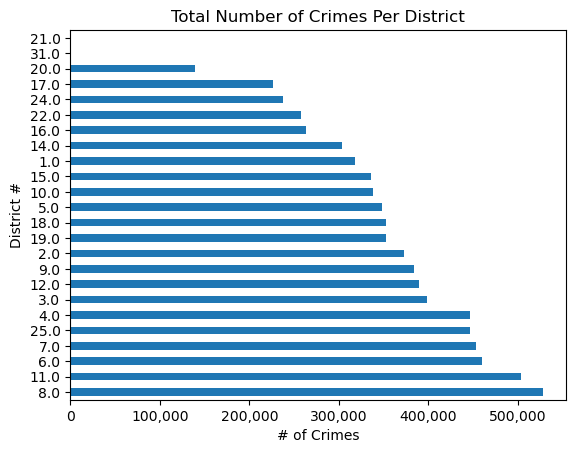

In [49]:
# Sort the dataframe by the value counts of the 'District' column in ascending order
sorted_df = df['District'].value_counts().sort_values(ascending=True)

# Plotting the sorted value counts by the district
ax = sorted_df.plot(kind='barh', xlabel='# of Crimes', ylabel='District #',
                   title='Total Number of Crimes Per District')

# Formatting x-axis labels with commas every 3 numbers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x):,}'))

# Reverse the y-axis to have the lowest district at the top
ax.invert_yaxis()


- District 8 has the most crimes at 527625
- District 21 has the least crimes at 4

## Question 2) Crimes Across the Years:
   - Is the total number of crimes increasing or decreasing across the years?
   - Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

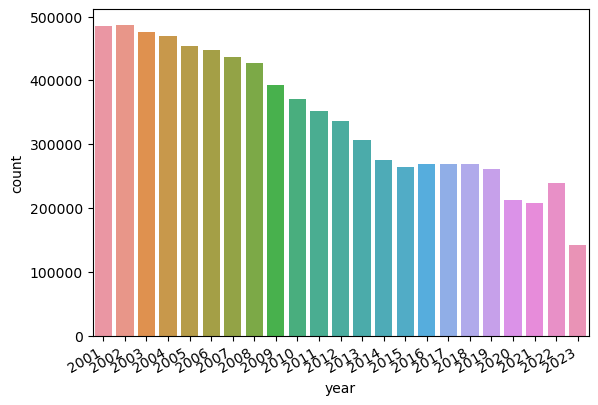

In [50]:
## Visualize years
ax = sns.countplot(data=df, x='year')
fig = ax.get_figure()
fig.autofmt_xdate()

In [ ]:
# Plot total crimes across years
df.plot(kind='line', title='Total Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('# of Crimes')
plt.show()